<div align="right">Revision 1 : August 2022</div>

<a href="https://colab.research.google.com/github/dewdotninja/robotics/blob/master/EMMErobo22_IUP/emmerobo22_IUP_hw2_soln.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="left">
<img src="https://raw.githubusercontent.com/dewdotninja/exams/main/feng_heading_en.png" width=400 alt="Feng heading"/>
</p>

#### Department of Mechanical Engineering

### Homework 2
Second Semester, Academic Year 2022

<br>**01211433  Vision and Control of Industrial Robots (International Undergraduate Program)**

Type student name - surname and ID in the cell below.

In [ ]:
#Solution  6010506258

#### Homework problems may depend on the last 3 digits of your student ID

-------xyz (other digits are ignored)

In case any digit in the last 3 are 0, it must be replaced by 5.

#### Examples
    
Student A's ID - 6010555853 results in x = 8, y = 5, z = 3

Student B 's ID - 6010546104 results in x = 1, y = 5, z = 4

Student C 's ID - 6310055032 results in x = 5, y = 3, z = 2
    
These valuess are used for all the problems in the exam where x,y,and/or z appear. In this 
sense, the results from each student should be different even computed using the same methods.

Operations that may be applied to the variables.

$+$ addition

 $-$  subtraction

 $*$  multiplication 

 $/$ division

$**$ raise to the power (For example, x**z means $x^z$)

including math opertions such as $\exp(x)$, $\sin(z*t)$

If a variable is embedded in some digit of a value without any operation symbol, 
just replace that digit. 
<br>For example,  z=8 y = 3 $\Rightarrow$ 12z7 = 1287, 4.3y5 = 4.335

Conditional statement may be used, such as
if x<5 do task A, otherwise do task B

<em>Example: </em> Let $R1 = 1000*x \,\Omega, C1 = 10*y \,\mu F$

<ul>
<li />Student A (x=8, y=5) does this problem with R1 = 8000 $\Omega$, C1 = 50 $\mu$F
<li />Student B (x=1, y=5) does this problem with R1 = 1000 $\Omega$, C1 = 50 $\mu$F
<li />Student C (x=5, y=3) does this problem with R1 = 5000 $\Omega$, C1 = 30 $\mu$F
</ul>


In [ ]:
# You need to install these libraries in the Colab environment
!pip install control

In [1]:
# import libraries you want to use
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

In [3]:
#Assume student ID 6010506258
id_x = 2
id_y = 5
id_z = 8

### P1 (10 points)

One device commonly used in industrial machines with rotary motion, such as robotic joints, is called a Harmonic Drive from a group of companies Harmonic Drive LLC. motor Hereafter, for the convenience of writing, it is abbreviated as the HDM system.

Figure 1 shows the structure of the HDM mechanism consisting of three parts: a circular spline, a flexspline, and an elliptical wave generator. The wave generator is connected to the shaft of a motor that rotates at high speed. A round ring has teeth inside. Between the two are separated by an elastic ring with teeth on the outside.

<p align="center">
<img src="https://drive.google.com/uc?id=1PtcGtTJ2iv81nLHz5Gb5mNnGeM_d5i4c" width=300 alt="Figure 1"/>
</p>
<div align="center"><b>Figure 1 HDM structure (https://www.harmonicdrive.net/)</b></div>

When drawing a schematic diagram of the HDM device connected to the DC motor, it will be shown in Figure 2. Left side is the motor's electrical system. and on the right is the mechanical system of the harmonic drive, represented by a soft shaft thru-axle gearbox with a hardness of k.

<p align="center">
<img src="https://drive.google.com/uc?id=1OP3LsMAgsHQ5uYdmVLQFHQLq55J-kYd7" width=550 alt="Figure 2"/>
</p>
<div align="center"><b>Figure 2 HDM block diagram </b></div>

Define
$$
p_l(s) = J_ls^2 + B_ls + k \tag{1}
$$
$$
p_m(s) = J_ms^2 + B_ms + k \tag{2}
$$
Overall transfer function of HDM can be described as 
$$
P(s) = \frac{\theta_l(s)}{V(s)} = \frac{k_mk}{p_m(s)p_l(s)(Ls+R)-k^2(Ls+R)+rk_mk_bsp_l(s)} \tag{3}
$$
assign parameter values (with x, y, z from your student ID)

<code>
	km = (y+z)*100  # torque constant
	kb = 1  # back EMF constant
	k = 1000 # torsional stiffness of harmonic drive
	r = x   # gear ratio
	R = 1  # armature resistance
	L = 0.1 # armature inductance
	Jm = (x+y)  #  motor inertia
	Bm = 0.01*y  # motor shaft friction
	Jl = (x+z)  # load inertia
	Bl = 0.01*z  # load friction
</code>

**P1.1** Write code to create a plant transfer function of HDM as in (3) (2 points)

#### Solution


In [4]:
km = (id_y+id_z)*100  # torque constant
kb = 1  # back EMF constant
k = 1000 # torsional stiffness of harmonic drive
r = id_x   # gear ratio
R = 1  # armature resistance
L = 0.1 # armature inductance
Jm = (id_x+id_y)  #  motor inertia
Bm = 0.01*id_y  # motor shaft friction
Jl = (id_x+id_z)  # load inertia
Bl = 0.01*id_z  # load friction	
s = ctl.tf("s")
p_l = Jl*s**2 + Bl*s + k
p_m = Jm*s**2 + Bm*s + k
P = km*k/(p_m*p_l*(L*s+R) - (k**2)*(L*s+R) + r*km*kb*s*p_l)
P

TransferFunction(array([1300000]), array([7.00000000e+00, 7.01060000e+01, 2.77010604e+04, 1.72210040e+04,
       2.60013000e+06, 0.00000000e+00]))

**P1.2** Plot poles and zeros of the transfer function from  **P1.1** on complex plane (2 points)

#### Solution

(array([-4.80872367+61.91966769j, -4.80872367-61.91966769j,
        -0.19884776 +9.81126476j, -0.19884776 -9.81126476j,
         0.         +0.j        ]),
 array([], dtype=complex128))

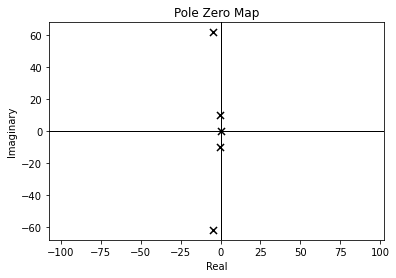

In [5]:
ctl.pzmap(P)

**P 1.3** Show Bode plot of the plant from **P1.1** with magnitude in dB and phase in degrees, in frequency range
0.01 - 1000 rad/s. What are the gain and phase margins of this plant? (2 point) 

**Note :** You must explicitly answer gain margin = ?, phase margin = ?. Don't just show an output from a function.
 
#### Solution

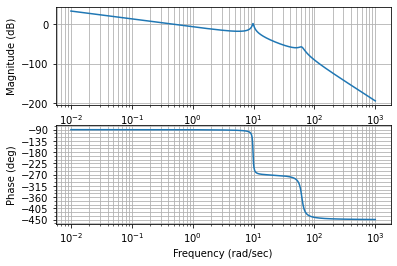

In [6]:
_,_,_ = ctl.bode_plot(P,dB=True, omega_limits=(0.01,1000))

In [7]:
ctl.margin(P) # gm, pm, wgm, wpm

(0.7752912278056704, -38.407025875286706, 9.808293470947646, 9.963969480443458)

Using the command ctl.margin() yields gain margin = 0.77 and phase margin = -38 degrees

**P1.4** From the feedback block diagram in Figure 3, use the plant from **P1.1** and a proportional control $C(s) = K = (x+y)$. Construct a transfer function mapping $d_i(s)$ to $y(s)$. If the closed-loop system is stable, find magnitude of $y(s)$ when $d_i(s) = sin(0.1t)$. Otherwise, simply state that the closed-loop system is unstable. 
(4 points)

<p align="center">
<img src="https://drive.google.com/uc?id=1CLNYYhbhGOpVaJULHdX13xoEv_AO2wyR" width=550 alt="Figure 3"/>
</p>
<div align="center"><b>Figure 3 general block diagram of feedback system</b></div>

In [11]:
K = id_x+id_y
L_1 = K*P
T_1 = ctl.minreal(ctl.feedback(L_1))
ctl.pole(T_1)

0 states have been removed from the model


array([-4.85243425+61.93001176j, -4.85243425-61.93001176j,
        1.45283169+10.13135769j,  1.45283169-10.13135769j,
       -3.21593774 +0.j        ])

Since some of the poles of $T(s)$ lie on the right half complex plane, the closed-loop system is unstable. 
We can verify by simulating the response asked in the problem.

Observe that the closed-loop transfer function from $d_i(s)$ to $y(s)$ is $P(s)S(s)$.

0 states have been removed from the model


/home/dew/miniconda3/envs/tensorflow/lib/python3.9/site-packages/scipy/sparse/linalg/matfuncs.py:709: LinAlgWarning: Ill-conditioned matrix (rcond=2.75538e-18): result may not be accurate.
  return solve(Q, P)


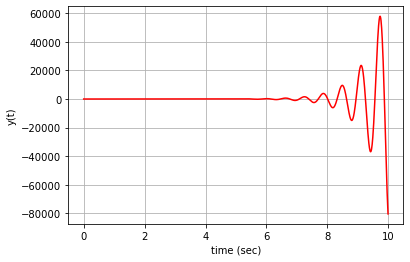

In [9]:
S_1 = 1/(1+L_1)
S_1 = ctl.minreal(S_1)
Sys = P*S_1
tvec = np.arange(0,10,0.01)
t,y = ctl.step_response(Sys,tvec)
plt.figure()
plt.plot(t,y,'r-')
plt.xlabel('time (sec)')
plt.ylabel('y(t)')
plt.grid(True)
plt.show()
